In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [3]:
#five point summary
#min, 25th, 50th percentile, 75th percentile 100th percentile
np.quantile(salary,[0,0.25,0.50,0.75,1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [15]:
df=pd.DataFrame(salary,columns=["salary"])

In [17]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


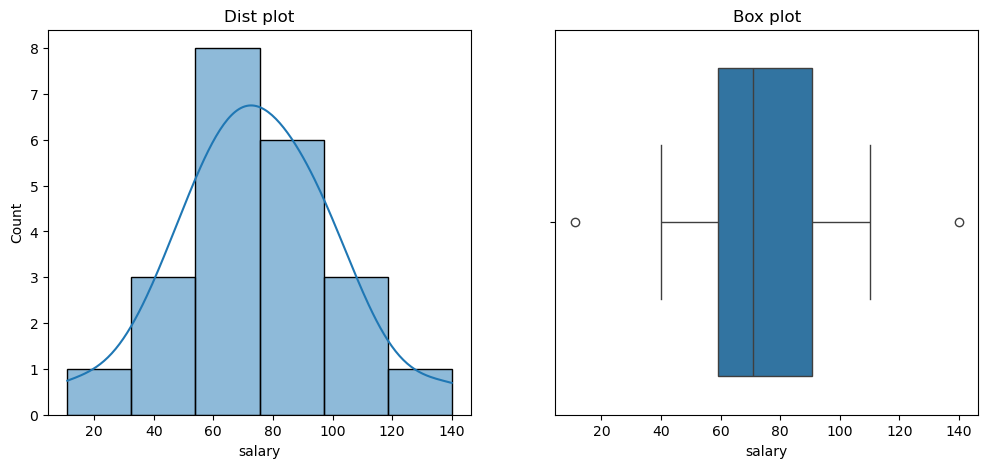

In [22]:
#To check outliers>> distplot, boxplot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["salary"],kde=True)
plt.title("Dist plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x="salary")
plt.title("Box plot")
plt.show()

In [24]:
#here the distribution is not skewed as the outliers are present on both side
#In box plot, we see there are outliers

#dropping the outlier

#replace with mean and median

#capping the outlier

In [ ]:
#dropping the outlier

In [28]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [30]:
df_filtered = df[(df.salary >= lower_fence) & (df.salary <= upper_fence)]

In [40]:
df.shape

(22, 1)

In [42]:
df_filtered.shape

(20, 1)

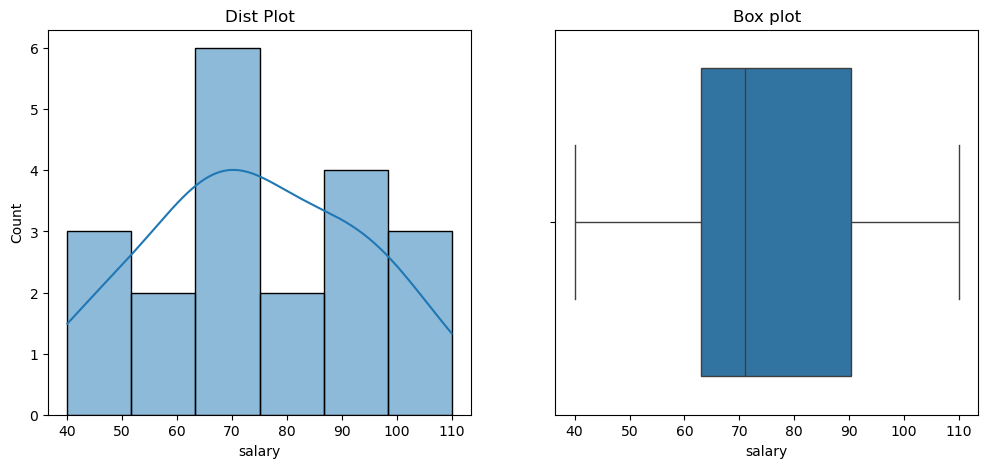

In [46]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['salary'], kde = True)
plt.title("Dist Plot")


plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, x = 'salary')
plt.title("Box plot")
plt.show()